<a href="https://colab.research.google.com/github/PyChef1/METODOS-NUMERICOS/blob/main/NodosChevyshev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nodos de Chevyshev y Fenomeno de Runge
Sabemos que el error de interpolacion en $[x_0,x_n]$ esta dado por: $$f(x)-P(x)=\frac{1}{(n+1)!}f^{(n+1)}(c)\prod_{i=0}^{n}(x-x_i)$$ donde $c\in(x_0,x_n)$. Y, en $[-1,1]$, el error maximo esta dado por $$\max_{-1\leq x\leq1}|f(x)-P(x)|.$$

Runge observo que en los extremos del intervalo una extrema oscilacion de polinomios interpoladores de grado alto con puntos uniformemente espaciados $$\lim_{n\to\infty}|f(x)-P_n(x)|=∞$$

Chevyshev mostro que, en $[-1,1]$, la oscilacion se minimiza si se escojen los nodos de la forma $$\prod_{i=0}^{n}(x-x_i)=\frac{1}{2^n}T_{n+1}(x)$$ donde $T_{n+1}(x)$ es el polinomio de Chevyshev de grado $n+1$


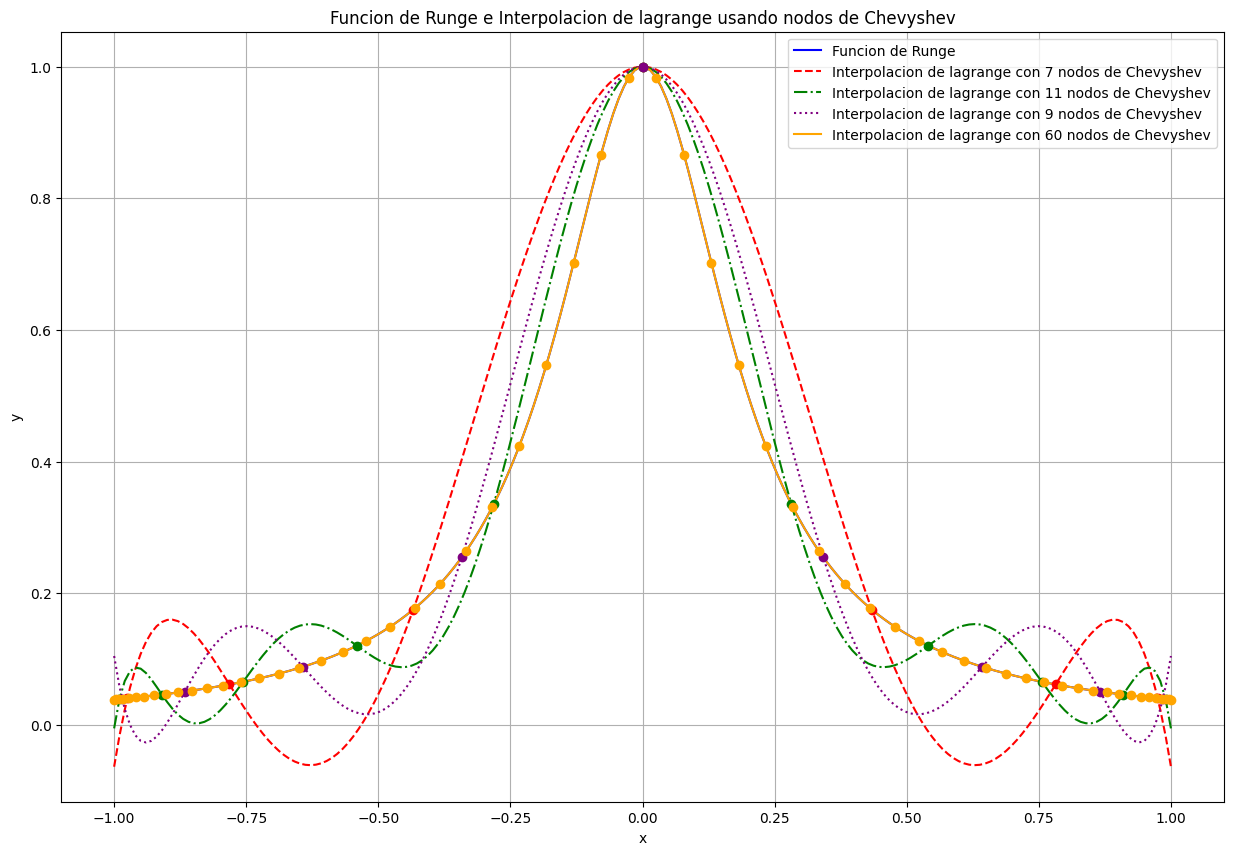

In [15]:
import numpy as np
import matplotlib.pyplot as plt

#Calcula los nodos de Chevyshev usando n_k = cos(2*k+1)/2*n
def chebyshev_nodos(n, a, b):
  k = np.arange(n)
  nodos = np.cos((2 * k + 1) * np.pi / (2 * n))
  return 0.5 * (b - a) * nodos + 0.5 * (a + b)


#Funcion de Runge
def runge(x):
  return 1 / (1 + 25 * x**2)

def interpolacion_lagrange(x_nodos, y_nodos, x):
  n = len(x_nodos)
  p = 0
  for i in range(n):
    li = 1
    for j in range(n):
      if i != j:
        li *= (x - x_nodos[j]) / (x_nodos[i] - x_nodos[j])
    p += y_nodos[i] * li
  return p


a, b = -1, 1
n = [7, 11, 9, 60]
x_plot= np.linspace(a, b, 200)
y_runge = runge(x_plot)
plt.figure(figsize=(15, 10))
plt.plot(x_plot, y_runge, label='Funcion de Runge', color='blue')
colors = ['red', 'green', 'purple', 'orange']
linestyles = ['--', '-.', ':', '-']

for i, n in enumerate(n):
    nodos = chebyshev_nodos(n, a, b)
    valores = runge(nodos)
    y_interpolation = [interpolacion_lagrange(nodos, valores, x) for x in x_plot]
    plt.plot(x_plot, y_interpolation, label=f'Interpolacion de lagrange con {n} nodos de Chevyshev', color=colors[i], linestyle=linestyles[i])
    plt.scatter(nodos, valores, color=colors[i], zorder=5)

nodos = chebyshev_nodos(n, a, b)
valores = runge(nodos)


y_interpolation = [interpolacion_lagrange(nodos, valores, x) for x in x_plot]

plt.title('Funcion de Runge e Interpolacion de lagrange usando nodos de Chevyshev')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()